In [23]:
%load_ext autoreload
%autoreload 2 
"""
This file contains code that will kick off training and testing processes
"""
import os
import json
import sys
from experiments.UNetExperiment import UNetExperiment
from data_prep.HippocampusDatasetLoader import LoadHippocampusData
from random import sample
from sklearn.model_selection import train_test_split
import torch
import numpy as np
class Config:
    """
    Holds configuration parameters
    """
    def __init__(self):
        self.name = "Basic_unet"
        self.root_dir = r"training_data"
        self.n_epochs = 10
        self.learning_rate = 0.0002
        self.batch_size = 8
        self.patch_size = 64
        self.test_results_dir = "./section2/out"




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:

# if __name__ == "__main__":
#     # Get configuration

# TASK: Fill in parameters of the Config class and specify directory where the data is stored and 
# directory where results will go
c = Config()

# Load data
print("Loading data...")

# TASK: LoadHippocampusData is not complete. Go to the implementation and complete it. 
data = LoadHippocampusData(c.root_dir, y_shape = c.patch_size, z_shape = c.patch_size)


# Create test-train-val split
# In a real world scenario you would probably do multiple splits for 
# multi-fold training to improve your model quality
keys = list(range(len(data)))

# Set up and run experiment
keys = np.random.permutation(keys)
split = dict()


# Create three keys in the dictionary: "train", "val" and "test". In each key, store
# the array with indices of training volumes to be used for training, validation 
# and testing respectively.
split['train'] = keys[0:int(0.7*len(keys))] # 70% training data
split['val'] = keys[int(0.7*len(keys)):int(0.9*len(keys))] # 20% validation data
split['test'] = keys[int(0.9*len(keys)):]      
# TASK: Class UNetExperiment has missing pieces. Go to the file and fill them in
exp = UNetExperiment(c, split, data)
exp.model.load_state_dict(torch.load('model.pth', map_location='cpu'))
exp.model.eval()
# You could free up memory by deleting the dataset
# as it has been copied into loaders
del data 

# run training
# exp.run()

# prep and run testing

# TASK: Test method is not complete. Go to the method and complete it
results_json, predictions = exp.run_test(return_pred_labels = True)

results_json["config"] = vars(c)

with open(os.path.join(exp.out_dir, "results.json"), 'w') as out_file:
    json.dump(results_json, out_file, indent=2, separators=(',', ': '))

Loading data...
Processed 260 files, total 9198 slices
Testing...
hippocampus_210.nii.gz Dice 0.9278. 3.85% complete
hippocampus_373.nii.gz Dice 0.9201. 7.69% complete
hippocampus_282.nii.gz Dice 0.8824. 11.54% complete
hippocampus_251.nii.gz Dice 0.8900. 15.38% complete
hippocampus_361.nii.gz Dice 0.8728. 19.23% complete
hippocampus_216.nii.gz Dice 0.9251. 23.08% complete
hippocampus_185.nii.gz Dice 0.9341. 26.92% complete
hippocampus_124.nii.gz Dice 0.9002. 30.77% complete
hippocampus_125.nii.gz Dice 0.8884. 34.62% complete
hippocampus_232.nii.gz Dice 0.9137. 38.46% complete
hippocampus_098.nii.gz Dice 0.9130. 42.31% complete
hippocampus_096.nii.gz Dice 0.9233. 46.15% complete
hippocampus_172.nii.gz Dice 0.9300. 50.00% complete
hippocampus_173.nii.gz Dice 0.8527. 53.85% complete
hippocampus_060.nii.gz Dice 0.8924. 57.69% complete
hippocampus_048.nii.gz Dice 0.9037. 61.54% complete
hippocampus_039.nii.gz Dice 0.9141. 65.38% complete
hippocampus_231.nii.gz Dice 0.8979. 69.23% complete


In [25]:
import numpy as np

In [20]:
len(predictions)

26

In [26]:
np.sum(predictions[0][0])

4145

In [27]:
np.sum(predictions[0][1])

4349

In [10]:
predictions[0][2]

'hippocampus_326.nii.gz'

In [65]:
# plt.rcParams["figure.figsize"] = (7,7)


def get_projection(segment_3d):
    segment_3d = np.array(segment_3d)
    vr = np.zeros((segment_3d.shape[1], segment_3d.shape[2]))

    for i in range(segment_3d.shape[0]):
        vr += segment_3d[i, :,:]
    return vr

In [99]:
len(predictions)*4

104

In [100]:
for i in range(0, 104, 4):
    print(i)

0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100


In [40]:
%matplotlib inline

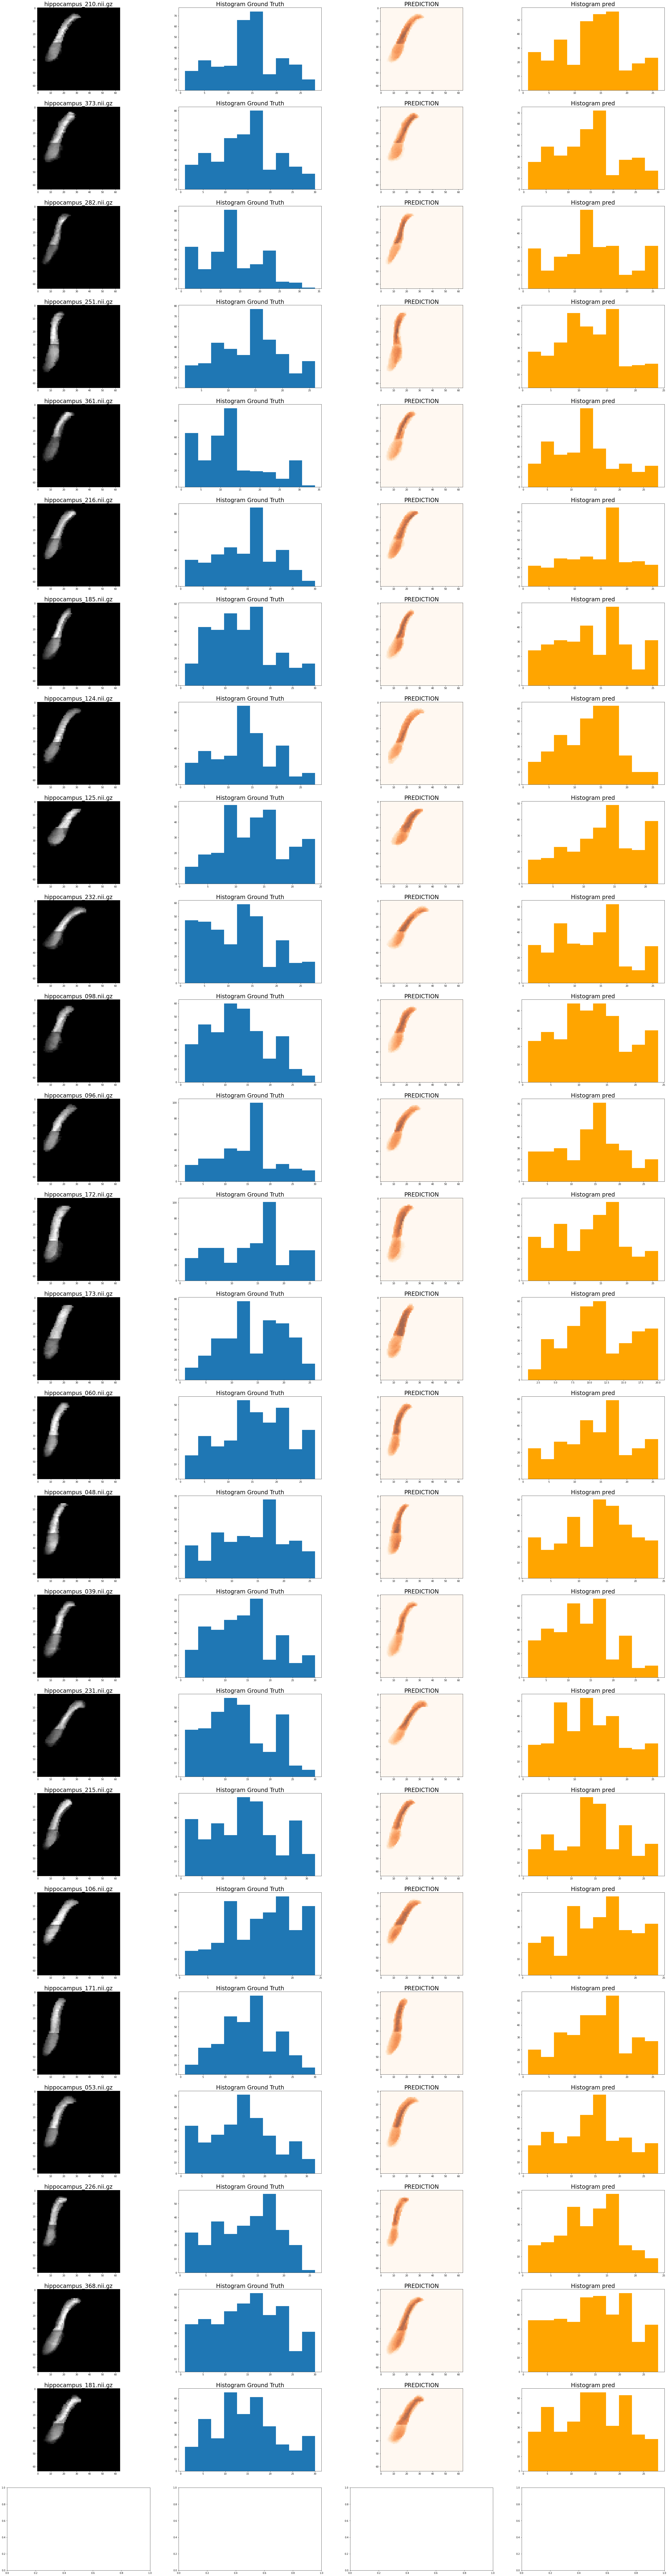

In [125]:
import matplotlib.pyplot as plt
import sys

fig, axs = plt.subplots(26, 4, figsize=(50, 200))
axs = axs.ravel()


for index, i in enumerate(range(0, 100, 4)):
    list_pred = predictions[index]

    pred = get_projection(list_pred[0])
    real = get_projection(list_pred[1])

    axs[i].set_title(list_pred[2], fontsize = 24)
    axs[i].imshow(real, cmap = "gray")
    axs[i+1].set_title("Histogram Ground Truth", fontsize = 24)
    axs[i+1].hist(real.ravel()[real.ravel()>0])
    
    axs[i+2].set_title("PREDICTION", fontsize = 24)
    axs[i+2].imshow(pred, cmap = "Oranges",  alpha=.7)    
    
    axs[i+3].set_title("Histogram pred", fontsize = 24)
    axs[i+3].hist(pred.ravel()[pred.ravel()>0], color = "orange")

plt.rcParams["figure.figsize"] = (13,15)

-----

In [28]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# D:\ws_gustavo\hyppocampal_volumen_quantification\section2\src\section2\out
base_path = 'D:/ws_gustavo/hyppocampal_volumen_quantification/section2/src/training_data'
# Load an image and a segmentation mask into variables called image and label
filename_image = base_path +'/images/hippocampus_001.nii.gz'
filename_label = base_path + '/labels/hippocampus_001.nii.gz'
image = nib.load(filename_image)
label = nib.load(filename_label)

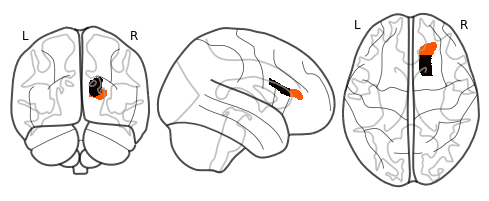

In [42]:
from nilearn import plotting
plotting.plot_glass_brain(filename_label)
plt.show()

In [56]:
list_pred_.shape

(37, 64, 64)

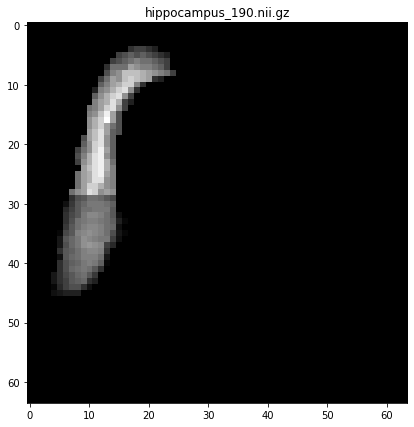

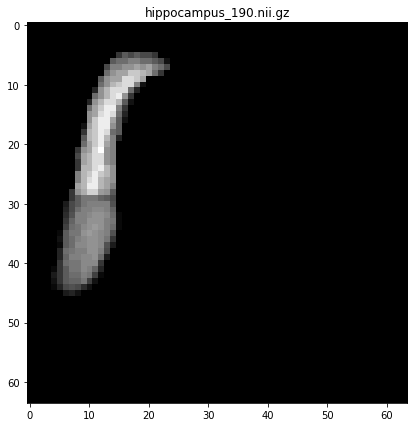

In [59]:
plt.rcParams["figure.figsize"] = (7,7)

list_pred_ = np.array(list_pred[0])
vr = np.zeros((list_pred_.shape[1], list_pred_.shape[2]))

for i in range(list_pred_.shape[0]):
    vr += list_pred_[i, :,:]
    
plt.title(list_pred[2])

plt.imshow(vr, cmap = "gray")